#XÂY DỰNG MÔ HÌNH DEEP LEARNING SỬ DỤNG THƯ VIỆN TensofFlow và Keras API
---
* **Mô tả ứng dụng:**

 + Xây dựng mô hình DL trong việc nhận dạng ảnh thời trang. Mô hình sẽ được huấn luyện dựa trên tập ảnh thời trang (T-Shirt, Dress, Skirt, Coat, Bag, Sneaker....) đã biết bao gồm: 
 
 + Tập dữ liệu đào tạo (Tranin) gồm 60.000 ảnh (28x28 pixel) các pixel có giá trị [0,255] các ảnh được gán nhãn [0,9] tương ứng với 10 phân loại thời trang [1) T-shirt/top , '2) Trouser',  '3) Pullover', '4) Dress', '5) Coat',  '6) Sandal', '7) Shirt', '8) Sneaker', '9) Bag', '10) Ankle boot' ]
 
 + Tập dữ liệu kiểm thử mô hình (Test) bao gồm 10.000 ảnh cũng được gán nhãn tương tự như tập Trainning. sử dụng để đánh giá độ chính xác của mô hình.
 
 + Mô hình sau khi xây dựng xong sẽ cho phép: đưa vào một ảnh thời trang bất kỳ (New_img), dựa vào mô hình DL đã xây dựng để dựa đoán xem Ảnh đưa vào đó sẽ thuộc danh mục thời trang nào trong 10 nhóm đã phân loại ở trên.  

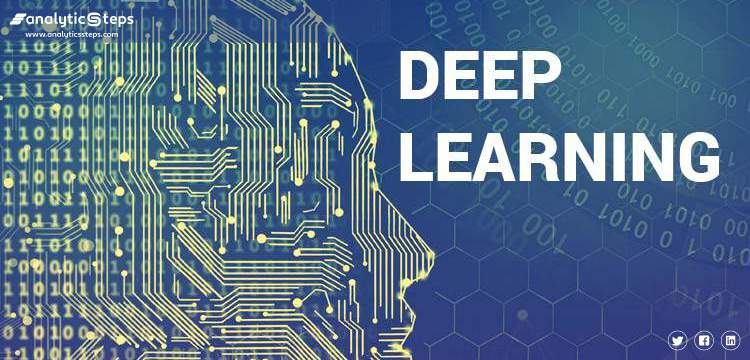

* Hướng dẫn chạy mô hình:
  + Kích chọn nút CONNECT trên thanh công cụ (góc trên bên phải)
  + Để chạy mã nguồn có 2 cách: 
        * Cách 1: Chạy toàn bộ mã nguồn của trang: Vào menu Runtime/Run All (Chạy toàn bộ các khối lệnh từ trên xuống dưới)
        * Cách 2: Chạy từng khối lệnh của ứng dụng: kích chuột vào khối lệnh muốn chạy trong ứng dụng, chọn biểu tượng Run Cell (Lề trên bên trái của khối lệnh được chọn) 

  ---
@ dangvannam@Department of Computer Science@FIT - HUMG



## 1.KHỞI TẠO MÔ HÌNH SỬ DỤNG THƯ VIỆN Tensorflow và Karas

+ Khai báo sử dụng thư viện Tensort (TensorFlow is an open-source machine learning library for research and production. TensorFlow offers APIs for beginners and experts to develop for desktop, mobile, web, and cloud)

+ Khai báo sử dụng Keras: Keras is a high-level API to build and train deep learning models

In [2]:
from __future__ import absolute_import, division, print_function

#khai bao su dung thu vien Tensorflow và keras API
import tensorflow as tf
from tensorflow import keras

#Khai báo sử dụng thư viện numpy để xử lý mảng
import numpy as np

#Khai báo sử dụng thư viện matplotlib để hiển thị ảnh và dự đoán của mô hình
import matplotlib.pyplot as plt

#view Version
print("Vesion Tensorflow :%s" %tf.__version__)
print("Version Keras: %s" %tf.keras.__version__)

Vesion Tensorflow :2.4.0
Version Keras: 2.4.0


## 2.LẤY DỮ LIỆU ĐỂ HUẤN LUYỆN VÀ KIỂM THỬ MÔ HÌNH
---
+ Tải dữ liệu Fashion từ MNIST dataset (Bộ dữ liệu mẫu về fushion của MNIST): Bao gồm 70 000 ảnh thang độ xám (28x28 pixels) - 10 danh mục. (60.000 ảnh trainning và 10.000 ảnh test)
+ Dữ liệu Trainning được lưu vào 2 mảng: 

  * Mảng train_img: một mảng lưu các ảnh của dữ liệu huấn luyện [0, 59.999]. mỗi ảnh lưu dưới dạng một ma trận điểm ảnh. ma trận có kích thước 28x28; mỗi phần tử của ma trận có giá trị [0,255] ứng với mã mầu của điểm ảnh đó.
  * Mảng train_label: Một mảng lưu các nhãn tương ứng của ảnh trong tập dữ liệu huấn luyện [0,59 999]. phần tử trong mảng có giá trị là một số nguyên [0, 9]
  * Mảng test_img: tương tự như train_img (10.000 ảnh cho tập dữ liệu kiểm thử mô hình)
  * Mảng test_label: tương tự train_label (Nhãn tương ứng với ảnh trong tập kiểm thử)

In [3]:
#Đọc tập dữ liệu mẫu
fashion_mnist = keras.datasets.fashion_mnist
(train_img,train_label),(test_img,test_label)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Tập Dữ liệu tải về được đưa vào 4 mảng trong thư viện NumPy

* Mảng dữ liệu (train_img, train_label) là tập dữ liệu huấn luyện. (Mô hình sử dụng để học)
* Mảng dữ liệu (test_img, test_label) là tập dữ liệu kiểm thử (Sử dụng để kiểm tra lại kết quả của mô hình học đã xây dựng)

+ ảnh là một mảng 28x28, mỗi pixel có giá trị trong khoảng [0,255], nhãn là giá trị số nguyên trong khoảng [0,9] 

Label      |     Class

0--->T-shirt/top   |   
1---> Trouser  |  
2	---->Pullover  |  
3	---> Dress  |  
4	--->Coat  |  
5	--->Sandal  |  
6	--->Shirt  |  
7	--->Sneaker  |  
8	--->Bag  |  
9	--->Ankle boot  |  




In [4]:
#Kích thước tập dữ liệu huấn luyện
train_img.shape

(60000, 28, 28)

In [5]:
#loại dữ liệu 
type(train_img)

numpy.ndarray

In [6]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#dữ liệu của 1 phần tử
print(train_img[1,:,:])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

* Hiển thị các thông tin về tập dữ liệu đưa vào mô hình

In [8]:
#Tập dữ liệu huấn luyện training 
print(train_img.shape)
print("Số lượng ảnh được sử dụng để huấn luyện (Tranning) mô hình: ", len(train_img))

print ("Nhãn được gán cho tập Training tương ứng: ", train_label)

(60000, 28, 28)
Số lượng ảnh được sử dụng để huấn luyện (Tranning) mô hình:  60000
Nhãn được gán cho tập Training tương ứng:  [9 0 0 ... 3 0 5]


In [9]:
#Thông tin Tập dữ liệu sử dụng Test mô hình
print(test_img.shape)
print ("Số ảnh được dùng để kiểm thử (Testing) mô hình: ", len(test_img))
print ("Nhãn được gán cho tập Test tương ứng: ", test_label)

(10000, 28, 28)
Số ảnh được dùng để kiểm thử (Testing) mô hình:  10000
Nhãn được gán cho tập Test tương ứng:  [9 2 1 ... 8 1 5]


In [10]:
#Gán nhãn cho 10 nhóm của fashion
class_name_fashion=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_name_fashion)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


+ Xử lý dữ liệu trước khi cho vào huấn luyện
(Dữ liệu ban đầu: Pixel ảnh nằm trong khoảng [0,255])

In [11]:
train_label[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Nhãn:  2  -  Pullover


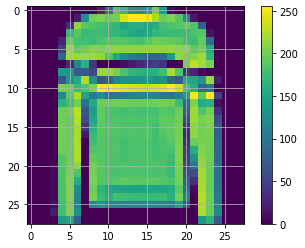

In [12]:
#View dữ liệu ở dạng ảnh
i = 5
print('Nhãn: ', train_label[i], ' - ', class_name_fashion[train_label[i]])
plt.figure()
plt.imshow(train_img[i])
plt.colorbar()
plt.grid(True)
plt.show()

**Scale data**

Trước khi đưa tập dữ liệu Training cần phải xử lý  đưa các giá trị pixel trong khoảng [0,1] bằng cách chia cho 255

In [13]:
#Ma trận dữ liệu điểm ảnh ban đầu là một ma trận có kích thước [28x28], 
#các phần tử của ma trận trong khoảng [0,255]
print (train_img[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [18]:
np.savetxt('img1.txt', train_img[1], delimiter = ' ', fmt='%3.0f')

In [19]:
#Tiền xử lý dữ liệu
# chuyen du lieu tap Train, Test ve [0,1]
train_img=train_img/255.0
test_img=test_img/255.0

In [16]:
#Ma trận dữ liệu điểm ảnh sau khi đã được chuyển về  [0,1]
print(train_img[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.55686275 0.78431373 0.41568627 0.
  0.         0.         0.         0.         0.         0.
  0.33333333 0.7254902  0.43921569 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.59607843 0.83921569 0.85098039 0.76078431 0.9254902  0.84705882
  0.73333333 0.58431373 0.52941176 0.6        0.82745098 0.85098039
  0.90588235 0.80392157 0.85098039 0.7372549  0.13333333 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25882353
  0.7254902  0.65098039 0.70588235 0.70980392 0.74509804 0.82745098
  0.86666667 0.77254902 0.57254902 0.77647059 0.80784314 0.74901961
  0.65882353 0.74509804 0.6745098  0.7372549  0.68627451 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.52941176
  0.6        0.62745098 0.68627

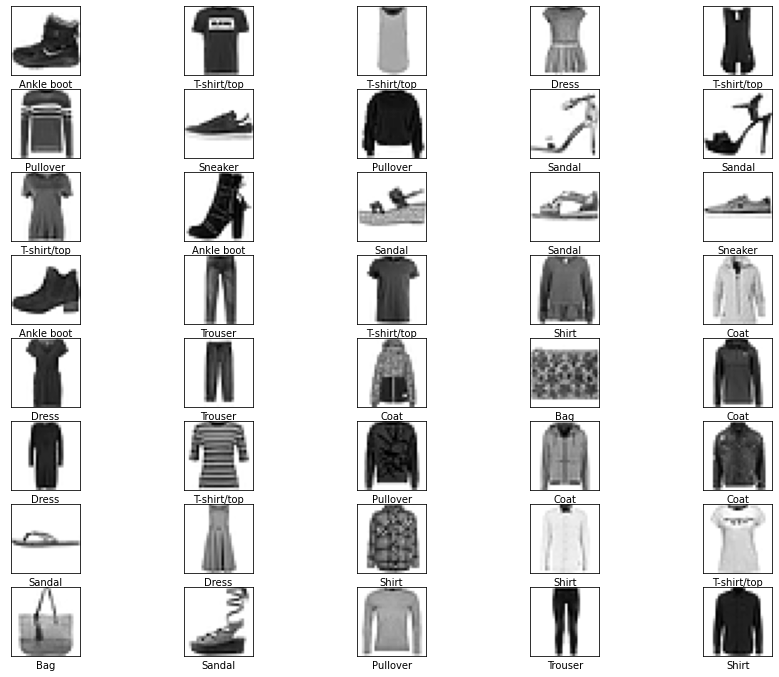

In [17]:
#Hiển thị 40 ảnh trong tập trainning để view
plt.figure(figsize=(15,15))
for i in range(40):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_img[i],cmap=plt.cm.binary)
  plt.xlabel(class_name_fashion[train_label[i]])
plt.show()

## 3.XÂY DỰNG MÔ HÌNH
---
Để xây dựng mô hình mạng noron yêu cầu cấu hình các lớp của mô hình:

+ Thiết lập các Layers:
    * Khối xây dựng cơ bản của một mạng noron là layer. layer chiết tách các đặc trưng từ dữ liệu được đưa vào. 
    * Hầu hết DL (Deep Learning) bao gồm chuỗi các Layer đơn giản cùng nhau



In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),         #Layer Input model
    keras.layers.Dense(256,activation=tf.nn.relu),     #Layer Hidden (1 layer)
    keras.layers.Dense(128,activation=tf.nn.relu),     #Layer Hidden (1 layer)
    keras.layers.Dense(10, activation=tf.nn.softmax)   #Layer output model
    
])

In [ ]:
model

* tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. **This layer has no parameters to learn; it only reformats the data.**
* tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## 4.BIÊN DỊCH MÔ HÌNH
---
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* **Loss function **—This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* **Optimizer** —This is how the model is updated based on the data it sees and its loss function. Learning rate = admam (tự động thiết lập tham số learning rate)
* **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 5.HUẤN LUYỆN MÔ HÌNH 
---
Để huấn luyện mô hình mạng noron yêu cầu các bước thực hiện sau:


1.   Đưa tập dữ liệu huấn luyện vào mô hình (train_img, train_label)
2.   Mô hình học cách liên kết hình ảnh và nhãn tương tứng
3. Đặt câu hỏi cho mô hình làm thế nào để dự đoán về tập dữ liệu test (test_img) dự đoán khớp với nhãn trong test_label



In [ ]:
model.fit(train_img,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6082 - accuracy: 0.7853
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3620 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3235 - accuracy: 0.8797
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2982 - accuracy: 0.8897
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2813 - accuracy: 0.8954


## 6.ĐÁNH GIÁ ĐỘ CHÍNH XÁC CỦA MÔ HÌNH XÂY DỰNG
---
Để đánh giá độ chính xác của mô hình đã xây dựng, sử dung tập dữ liệu Test để chạy lại mô hình. 

2 thông số được xác định để kiểm tra độ chính xác là:
  * Loss: Hàm mất mát
  * Acc: Độ chính xác

In [ ]:
test_loss,test_acc=model.evaluate(test_img,test_label)
print("Test accuracy: %f" %test_acc)
print("Test loss:%4f"%test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.3339 - accuracy: 0.8833
Test accuracy: 0.883300
Test loss:0.333875


## 7.ĐƯA RA DỰ ĐOÁN CỦA MÔ HÌNH VỚI MỘT SỐ ẢNH TRONG TẬP DỮ LIỆU TEST
---
* với mô hình huấn luyện, chúng ta có thể sử dụng nó để đưa ra dự đoán về một số ảnh.
* Xem mô hình đưa ra dự đoán về bức ảnh đầu tiên trong tập dữ liệu test.


In [ ]:
import numpy as np
predictions = model.predict(test_img)
n=100
print(np.round(predictions[n],3))

[0.001 0.    0.    0.998 0.    0.    0.    0.    0.    0.   ]


Một dự đoán là một mảng của 10 số. Mô tả sự tin cậy của mô hình, ảnh tương xứng với một trong 10 danh mục khác nhau của quần áo.

In [ ]:
#Lấy giá trị cao nhất trong 10 label đầu ra
an=np.argmax(predictions[n])
print('Label model dự đoán:', an)
print('Label của tập nhất: ', test_label[n])

Label model dự đoán: 3
Label của tập nhất:  3


###VIẾT HÀM HỖ TRỢ TRỰC QUAN HÓA : Viết thêm một số hàm hỗ trợ hiển thị ảnh và kết quả dự đoán của mô hình
----
Viết thêm hàm hỗ trợ hiển thị trực quan việc dự đoán
 * Hàm **show_img(img)**: Hiển thị ảnh từ ma trận điểm ảnh ra đồ thị 


In [ ]:
def show_img(img):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
 #plt.imshow(img, cmap=plt.cm.binary)
 # plt.figure()
  plt.imshow(img)
  plt.colorbar()
  plt.grid(True)
  plt.show()


* Hàm **plot_image()**: Hiển thị một ảnh cùng với nhãn ở dưới bao gồm: Nhãn dự đoán của mô hình ---% chính xác ---Nhãn đúng theo dữ liệu test (sử dụng để hiển thị kết quả trong phần chạy kiểm thử mô hình)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array = predictions_array[i] 
  true_label =  true_label[i]
  img = img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("Predic: {} - Acc: {:2.0f}% ({})".format(class_name_fashion[predicted_label],
                                100*np.max(predictions_array),
                                class_name_fashion[true_label]),
                                color=color)

* Hàm **plot_value_array()**: Hiển thị đồ thị cho biết các kết quả đánh giá độ chính xác của ảnh đưa vào với danh mục thời trang

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array = predictions_array[i]
  true_label = true_label[i]
  plt.grid(True)
  plt.xticks(range(10), class_name_fashion, rotation=90)
  #plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###HIỂN THỊ KẾT QUẢ KIỂM THỬ MÔ HÌNH: Hiển thị kết quả chạy mô hình với dữ liệu test 
* Cột màu xanh thể hiện kết quả dự đoán của mô hình trùng khớp với nhãn định sẵn của ảnh. (Dự đoán chính xác)
* Cột màu đỏ thể hiện kết quả dự đoán của mô hình không đúng với nhãn định sẵn của ảnh (Dự đoán không chính xác)

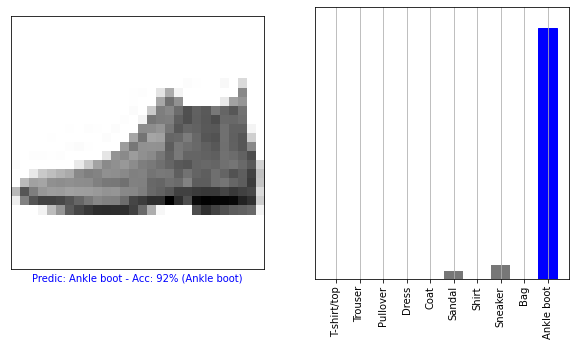

In [ ]:
#Trường hợp dự đoán đúng
i=0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)

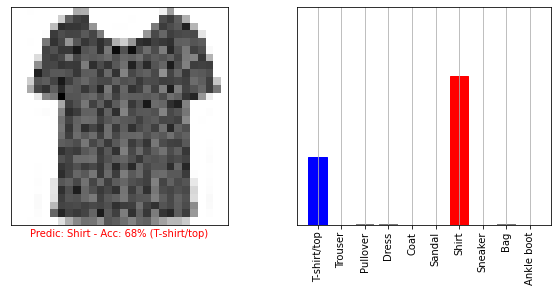

In [ ]:
#Trường hợp dự đoán sai
i=1000
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)

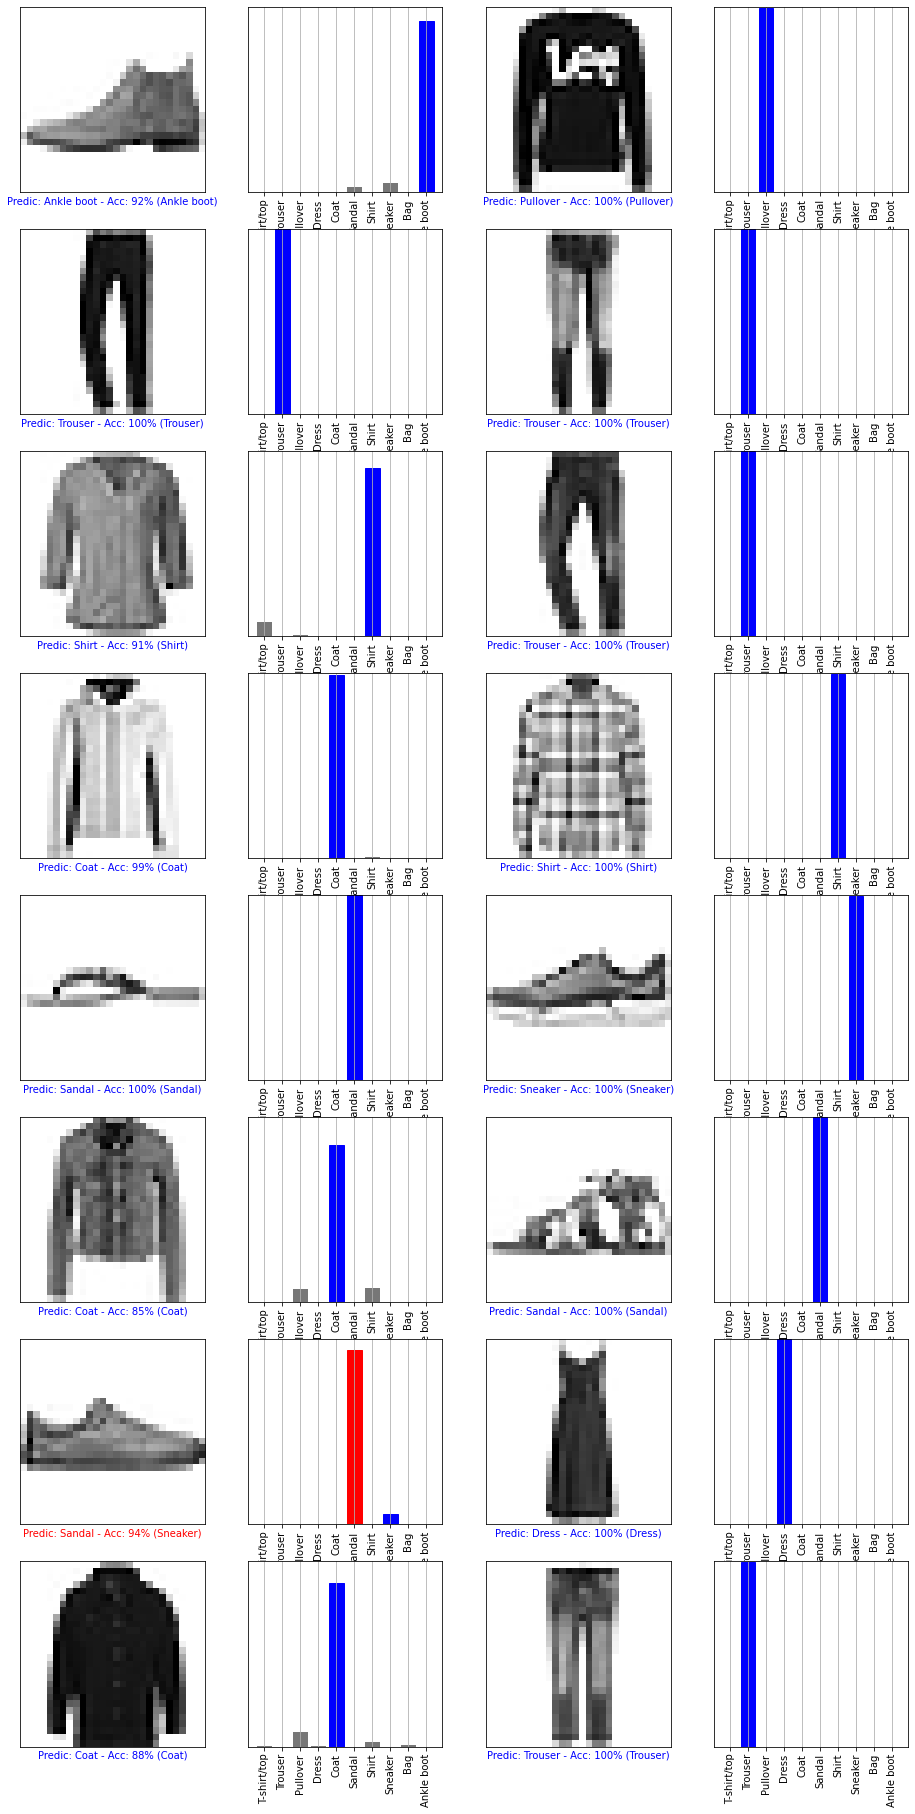

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)

##SỬ DỤNG MÔ HÌNH HUẤN LUYỆN ĐỂ ĐƯA RA QUYẾT ĐỊNH VỀ MỘT ẢNH ĐƯỢC ĐƯA VÀO

(sử dụng một ảnh trong tập test như là một ảnh mới cho vào mô hình huấn luyện để dự đoán kết quả)

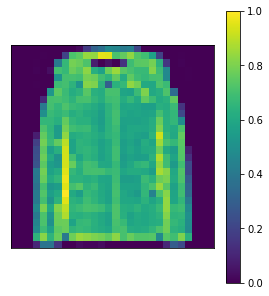

In [ ]:
import random as ra
i = ra.randint(0,10000)

#Lấy một ảnh ngẫu nhiên trong 10 000 ảnh của tập test để làm ví dụ
new_img = test_img[i] 

#Gọi hàm hiển thị ảnh đầu vào đưa vào dự đoán
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_img(test_img[i])

new_img = (np.expand_dims(new_img,0))

Coat


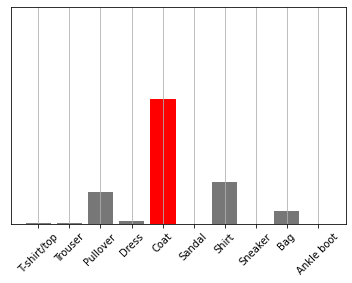

In [ ]:
#Lấy quyết định của mô hình ứng với ảnh mới

predic_new_img=model.predict(new_img)

print(class_name_fashion[np.argmax(predic_new_img)])

#hiển thị kết quả dự đoán của mô hình

plot_value_array(0, predic_new_img, test_label)
_ = plt.xticks(range(10), class_name_fashion, rotation=45)

In [ ]:
import pandas as pd
import numpy as np

a = pd.Series(predic_new_img.ravel())
b = pd.Series(class_name_fashion)
result = pd.DataFrame({'Name':b,'Probability':a})
result['Probability'] = result.Probability.round(5)
result

,Name,Probability
0,T-shirt/top,0.00712
1,Trouser,0.00461
2,Pullover,0.14661
3,Dress,0.01461
4,Coat,0.57302
5,Sandal,0.00023
6,Shirt,0.19521
7,Sneaker,0.00007
8,Bag,0.05824
9,Ankle boot,0.00028
